# BIAS (V2) Report
A long term portfolio with big tech bias.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from src.execution.signals.bias import *
from src.execution.portfolio import Portfolio
from src.utils.time import today

from IPython.display import Markdown as md

In [3]:
md(f"""
### Report Date: {today()}
Universe: {TICKERS}
""")


### Report Date: 2021-10-02
Universe: ['USMV', 'QQQ', 'AAPL', 'MSFT', 'AMZN', 'GOOG', 'CRM', 'SPGI', 'MSCI', 'ICE', 'CME', 'NDAQ']


In [5]:
NOTIONAL = 10000

## Performance

In [17]:
bias = Portfolio([BiasV2(fractional=True)])

In [18]:
await bias.backtest(NOTIONAL)

[2021-10-02 16:28:15.339] [INFO] [portfolio:update:54] Updating BiasV2


100%|█████████████████████████████████████████████████████████| 36/36 [00:00<00:00, 50.47it/s]

[2021-10-02 16:28:16.062] [INFO] [portfolio:run_benchmark:73] Running portfolio benchmark: Signal(name=SPY)
[2021-10-02 16:28:16.063] [INFO] [signal:fetch:47] Fetching SPY


In [19]:
bias.weights.drop_duplicates().tail(5)

Symbols,USMV,QQQ,ICE,CME,MSFT,SPGI,GOOG,NDAQ,AMZN,AAPL,CRM,MSCI
Date,,,,,,,,,,,,
2020-09-30,0.088780,0.085676,0.085291,0.082961,0.082666,0.082609,0.084609,0.083842,0.083579,0.081063,0.077939,0.080983
2020-12-31,0.090050,0.085858,0.085835,0.082601,0.082955,0.082932,0.083981,0.084162,0.082326,0.080588,0.078117,0.080596
2021-03-31,0.092567,0.084496,0.086476,0.082375,0.083207,0.083877,0.081953,0.084965,0.081595,0.079614,0.078528,0.080347
2021-06-30,0.093321,0.084652,0.085956,0.082691,0.082917,0.083247,0.081857,0.084611,0.081434,0.079923,0.078465,0.080925
2021-09-30,0.092814,0.085722,0.086516,0.082664,0.083219,0.082954,0.081891,0.084799,0.080468,0.080502,0.078775,0.079677


### Cumulative Returns

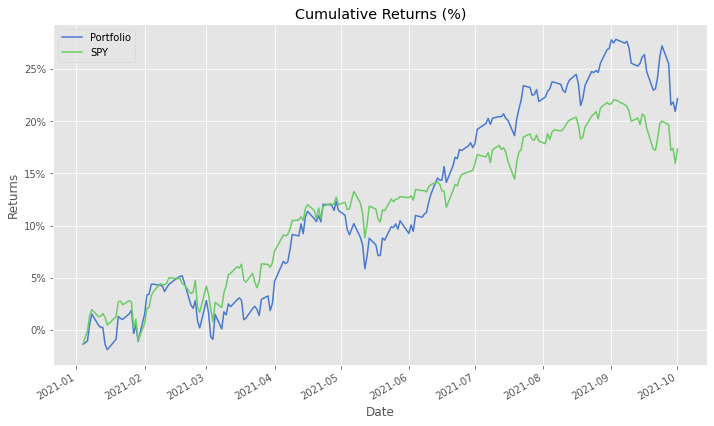

In [20]:
bias.cumulative_returns()

### 2021 Q2 Performance

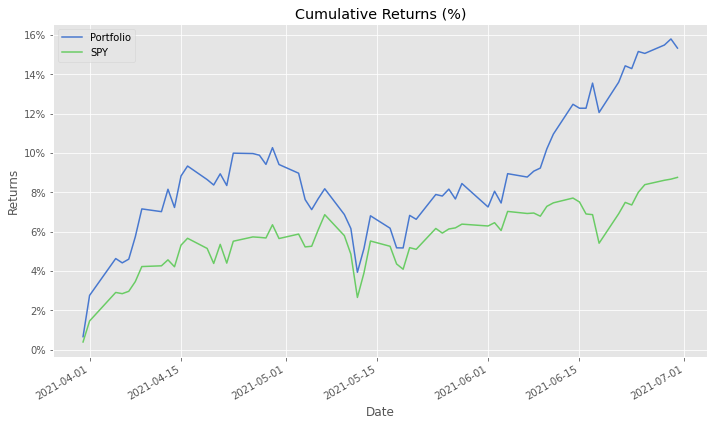

In [21]:
bias.cumulative_returns(start='2021-03-31', end='2021-06-30')

### 2021 Q3 Performance

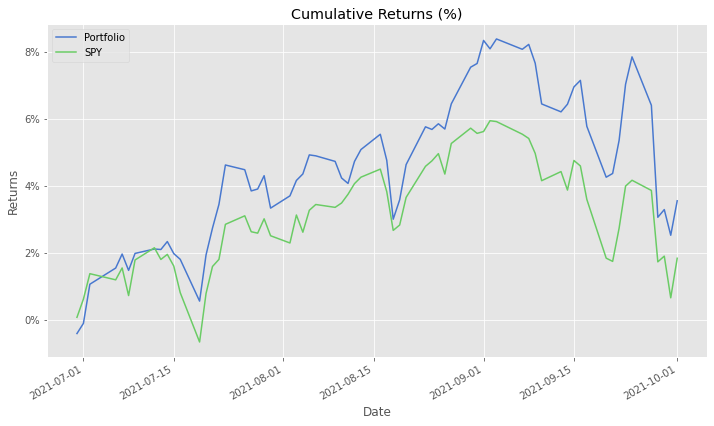

In [22]:
bias.cumulative_returns(start='2021-06-30')

## Correlations

In [23]:
from src.config import SIGNALS
from src.cli import signal_from_name
from src.execution.utils import parse

In [24]:
signals = [signal_from_name(name) for name in parse(SIGNALS)]
cubby = Portfolio(signals=signals)

In [25]:
await cubby.backtest(NOTIONAL)

[2021-10-02 16:28:40.270] [INFO] [portfolio:update:54] Updating Cubby
[2021-10-02 16:28:40.287] [INFO] [portfolio:update:54] Updating IBS
[2021-10-02 16:28:44.112] [INFO] [portfolio:update:54] Updating Butterfly3X
[2021-10-02 16:28:44.594] [INFO] [portfolio:update:54] Updating Factor
[2021-10-02 16:28:45.712] [INFO] [portfolio:update:54] Updating GlobalReversal
[2021-10-02 16:28:45.720] [INFO] [portfolio:run_benchmark:73] Running portfolio benchmark: Signal(name=SPY)
[2021-10-02 16:28:45.721] [INFO] [signal:fetch:47] Fetching SPY


In [26]:
from src.execution.plotting import plot_correlations

### BIAS' Correlation with SPY

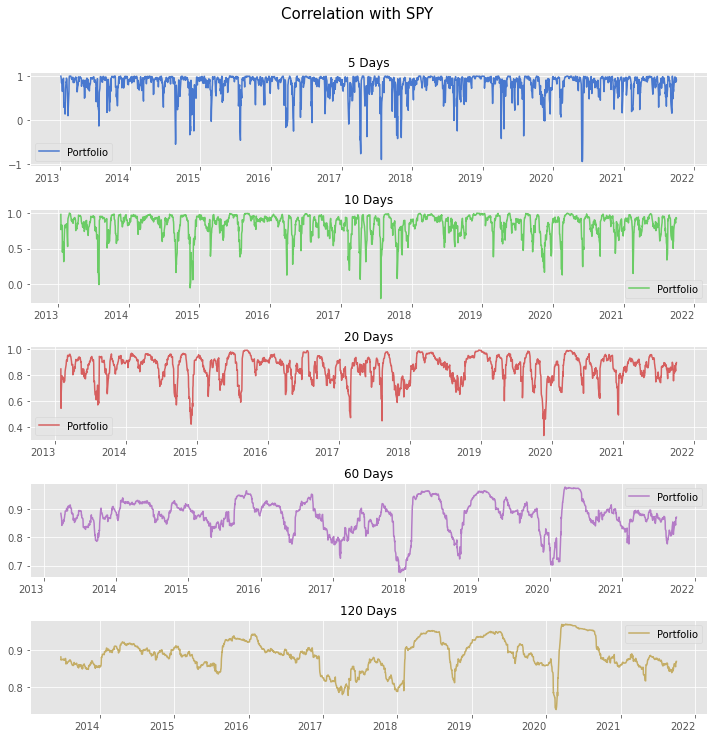

In [29]:
bias.correlations()

### BIAS' correlation with Cubby

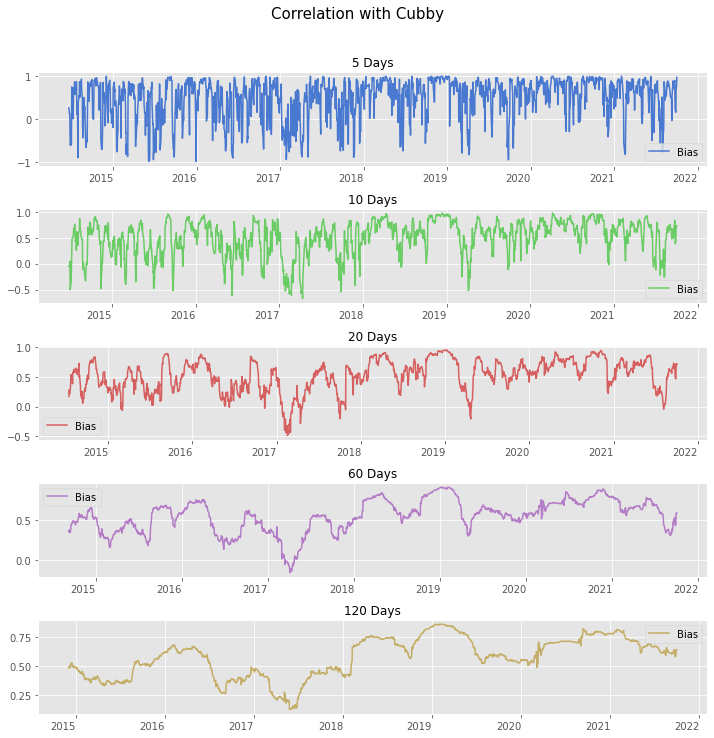

In [32]:
plot_correlations(returns, 'Cubby')

In [33]:
returns.rolling(252).corr().tail(1)

,,Bias,Cubby
Date,,,
2021-10-01,Cubby,0.688344,1.0


## Next Quarter

In [42]:
Q3 = '2021-06-30'
Q4 = '2021-09-30'
b = BiasV2(date = Q4)

In [43]:
await b.backtest(NOTIONAL)

[2021-10-02 16:30:20.924] [INFO] [signal:fetch:47] Fetching BiasV2


100%|█████████████████████████████████████████████████████████| 36/36 [00:00<00:00, 51.53it/s]


In [44]:
df = pd.concat([b._compute_weight(Q3), b._compute_weight(Q4)], axis=1, keys=['2021-Q3', '2021-Q4'])

In [45]:
df

,2021-Q3,2021-Q4
Symbols,,
USMV,0.093321,0.092814
ICE,0.085956,0.086516
QQQ,0.084652,0.085722
NDAQ,0.084611,0.084799
SPGI,0.083247,0.082954
MSFT,0.082917,0.083219
CME,0.082691,0.082664
GOOG,0.081857,0.081891
AMZN,0.081434,0.080468
